Q7
représentation des militant.e.s syndicalistes cette requête permet de voir la participation des individus à des syndicats, notamment du point de vue du genre. 
besoin :

table personne
>nom/prénom
ID
genre

table participation
>fk_personne
fk_organisation

table organisation
>organisation
fk_type_O

table type organisation
> nom



## 7.1 participation aux syndicats

In [1]:
import sqlite3
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns
connection = sqlite3.connect('C:/Users/LZender/Documents/Travail/unine/histoire/mémoire/AEN/grand_conseil/memoire_POP/liste_grand_conseil.db')


cursor = connection.cursor()

In [31]:
df_syndicats = pandas.read_sql("""
SELECT pe.nom as nom, pe.prenom as prenom, pe.genre as genre,  pe.adhesion as adhesion, o.nom as syndicat FROM personne as pe
LEFT JOIN appartenance as a ON a.fk_personne = pe.pk_personne
LEFT JOIN organisation as o ON o.pk_organisation = a.fk_organisation
LEFT JOIN type_O as t ON t.pk_type_O = o.fk_type_O

where o.pk_organisation is not null AND t.nom='syndicat'
group by pk_personne
order by adhesion ASC
""", connection)

df_syndicats.head(1000)

,nom,prenom,genre,adhesion,syndicat
0,froidevaux,denis,M,NaN,FOMH
1,rion,armand,M,1946.0,FOMH
2,matile,willy,M,1953.0,FCTA
3,voirol,paul,M,1955.0,FOMH
4,bassin,willy,M,1955.0,SSP
...,...,...,...,...,...
188,papetti,chantal,F,1976.0,SSP
189,geiser,martine,F,1977.0,SSP
190,dubois,andre,M,1978.0,SSP
191,bigarini_gether,suzanne,F,1978.0,SSEC


### 7.1.1 répartition selon le genre et le syndicat

In [17]:
df_syndicats = pandas.read_sql("""
SELECT 
  pe.genre AS genre,
  o.nom AS syndicat,
  COUNT(DISTINCT pe.pk_personne) AS nombre_membres
FROM personne AS pe
LEFT JOIN appartenance AS a ON a.fk_personne = pe.pk_personne
LEFT JOIN organisation AS o ON o.pk_organisation = a.fk_organisation
LEFT JOIN type_O AS t ON t.pk_type_O = o.fk_type_O
WHERE o.pk_organisation IS NOT NULL
  AND t.nom = 'syndicat'
GROUP BY pe.genre, o.nom
ORDER BY o.nom, pe.genre;
""", connection)

# Total général sur l'ensemble des lignes
total_general = df_syndicats['nombre_membres'].sum()

# Pourcentage sur l'ensemble des métiers recensés
df_syndicats['pourcentage'] = df_syndicats['nombre_membres'] / total_general * 100.0

# Optionnel : réinitialiser l'index pour une table bien propre
df_syndicats = df_syndicats.reset_index(drop=True)

# Affichage du résultat
print(df_syndicats[['genre', 'syndicat', 'nombre_membres', 'pourcentage']])


   genre                                           syndicat  nombre_membres  \
0      M                                                ASV               1   
1      F                                               FCTA               1   
2      M                                               FCTA               6   
3      F                                               FOMH              22   
4      M                                               FOMH             100   
5      M                                                FST               6   
6      M                                               FTCP               1   
7      M                                                SEV               5   
8      F                                               SSEC               4   
9      M                                               SSEC               2   
10     F                                                SSP              12   
11     M                                            

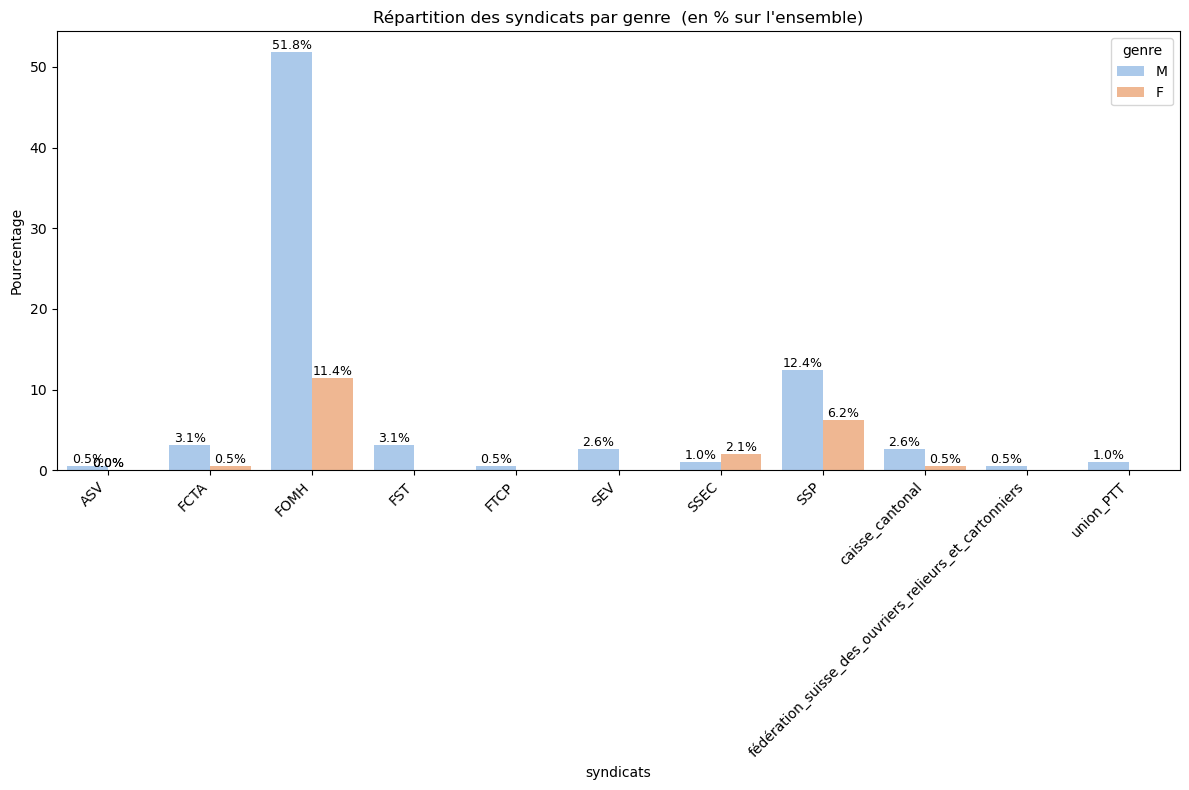

In [30]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_syndicats, x='syndicat', y='pourcentage', hue='genre', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des syndicats par genre  (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("syndicats")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_07_répartition_syndicats_genre_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

### 7.1.2 militantEs dans les syndicats

In [45]:
df_syndicat_militante = pandas.read_sql("""
SELECT pe.nom as nom, pe.prenom as prenom, pe.genre as genre,  pe.adhesion as adhesion, o.nom as syndicat FROM personne as pe
LEFT JOIN appartenance as a ON a.fk_personne = pe.pk_personne
LEFT JOIN organisation as o ON o.pk_organisation = a.fk_organisation
LEFT JOIN type_O as t ON t.pk_type_O = o.fk_type_O

where o.pk_organisation is not null AND t.nom='syndicat' AND pe.genre='F'
group by pk_personne
order by nom ASC
""", connection)

df_syndicat_militante.head(1000)

,nom,prenom,genre,adhesion,syndicat
0,Eplattenier,lily,F,1967,SSP
1,aebischer,suzanne,F,1964,SSEC
2,aeschlimann,jeanne-marie,F,1961,FOMH
3,amez-droz,isabelle,F,1965,FOMH
4,berger,marie-claude,F,1967,FOMH
5,bigarini_gether,suzanne,F,1978,SSEC
6,blandenier,helene,F,1965,FOMH
7,boichat,suzanne,F,1963,SSP
8,brigadoi,cecile,F,1956,FOMH
9,brigadoi,josette,F,1979,SSP


In [47]:
df_syndicat_militante.to_csv('CSV/question_07_syndicat_militantes.csv')

### répartition des militantes dans les syndicats

In [37]:
df_noms_syndicat_F = pandas.read_sql("""
SELECT COUNT (pk_appartenance) as count_participation, o.nom as nom_syndicat FROM personne as pe
LEFT JOIN appartenance as a ON a.fk_personne = pe.pk_personne
LEFT JOIN organisation as o ON o.pk_organisation = a.fk_organisation
LEFT JOIN type_O as t ON t.pk_type_O = o.fk_type_O

where o.pk_organisation is not null AND t.nom='syndicat' AND genre='F'
group by nom_syndicat
""", connection)

total= df_noms_syndicat_F['count_participation'].sum()

df_noms_syndicat_F['pourcentage']= df_noms_syndicat_F['count_participation']/ total * 100.00

df_noms_syndicat_F.head(1000)

,count_participation,nom_syndicat,pourcentage
0,1,FCTA,2.5
1,22,FOMH,55.0
2,4,SSEC,10.0
3,12,SSP,30.0
4,1,caisse_cantonal,2.5


C:\Users\LZender\AppData\Local\Temp\ipykernel_8024\1097504861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_noms_syndicat_F, x='nom_syndicat', y='pourcentage',  palette='pastel')


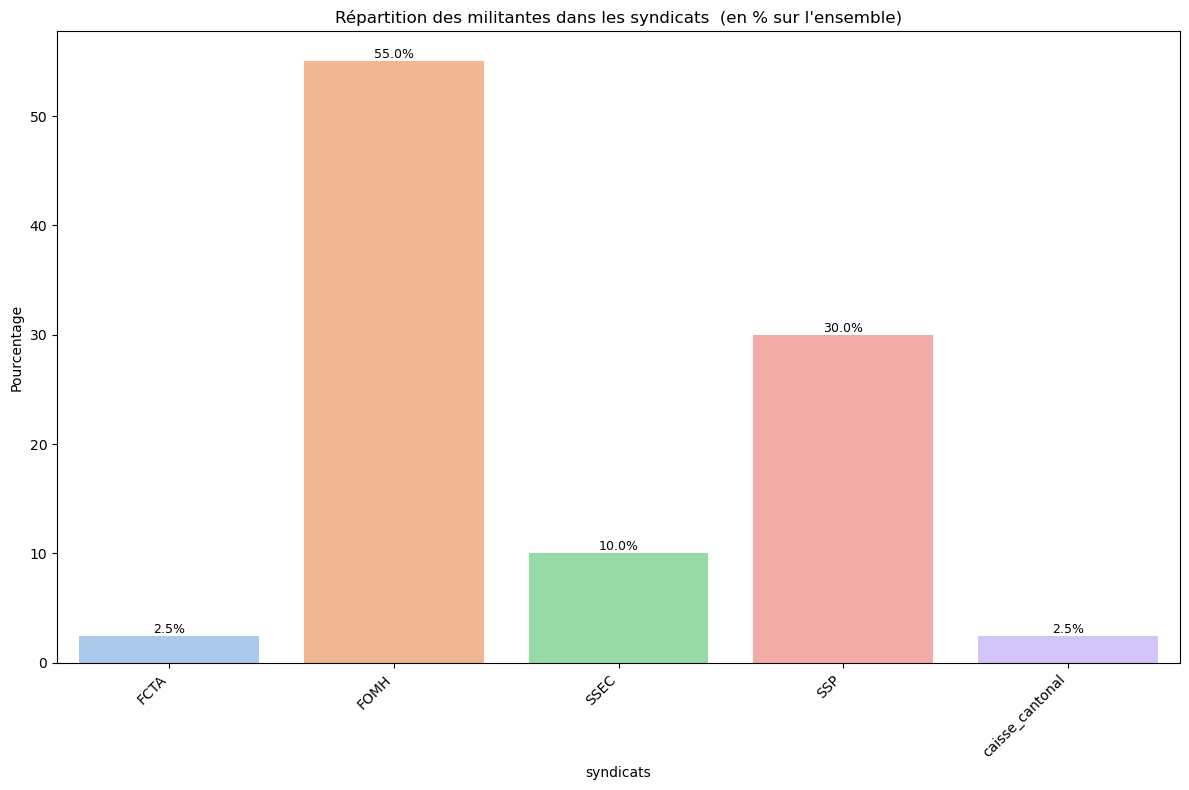

In [51]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_noms_syndicat_F, x='nom_syndicat', y='pourcentage',  palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des militantes dans les syndicats  (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("syndicats")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_07_syndicats_F_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 7.2 répartition dans les syndicats

In [26]:
df_noms_syndicat = pandas.read_sql("""
SELECT COUNT (pk_appartenance) as count_participation, o.nom as nom_syndicat FROM personne as pe
LEFT JOIN appartenance as a ON a.fk_personne = pe.pk_personne
LEFT JOIN organisation as o ON o.pk_organisation = a.fk_organisation
LEFT JOIN type_O as t ON t.pk_type_O = o.fk_type_O

where o.pk_organisation is not null AND t.nom='syndicat'
group by nom_syndicat
""", connection)

total= df_noms_syndicat['count_participation'].sum()

df_noms_syndicat['pourcentage']= df_noms_syndicat['count_participation']/ total * 100.00

df_noms_syndicat.head(1000)

,count_participation,nom_syndicat,pourcentage
0,1,ASV,0.518135
1,7,FCTA,3.626943
2,122,FOMH,63.212435
3,6,FST,3.108808
4,1,FTCP,0.518135
5,5,SEV,2.590674
6,6,SSEC,3.108808
7,36,SSP,18.652850
8,6,caisse_cantonal,3.108808
9,1,fédération_suisse_des_ouvriers_relieurs_et_car...,0.518135


C:\Users\LZender\AppData\Local\Temp\ipykernel_8024\138242616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_noms_syndicat, x='nom_syndicat', y='pourcentage',  palette='pastel')


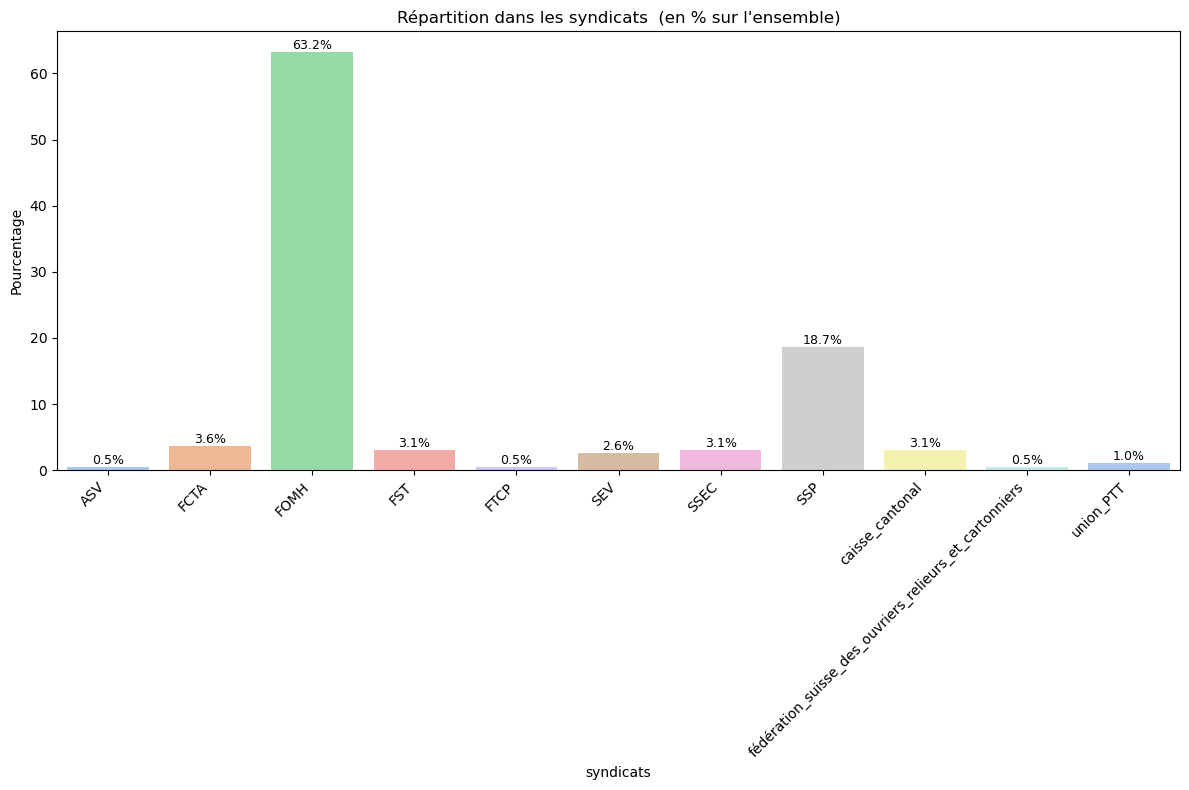

In [52]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_noms_syndicat, x='nom_syndicat', y='pourcentage',  palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition dans les syndicats  (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("syndicats")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_07_noms_syndicat_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

## 7.3 participation des militants à l'UFFP et à la FFSPP

In [48]:
df_UFPP = pandas.read_sql("""
SELECT pe.nom as nom, pe.prenom as prenom, pe.genre as genre, pe.adhesion as adhesion, o.nom as syndicat FROM personne as pe
LEFT JOIN appartenance as a ON a.fk_personne = pe.pk_personne
LEFT JOIN organisation as o ON o.pk_organisation = a.fk_organisation
LEFT JOIN type_O as t ON t.pk_type_O = o.fk_type_O

where  o.pk_organisation is not null AND t.nom='association' 
group by pk_personne
order by nom ASC
""", connection)

df_UFPP.head(1000)

,nom,prenom,genre,adhesion,syndicat
0,None,bartschi,F,NaN,UFPP
1,Eplattenier,lily,F,1967.0,UFPP
2,aeschlimann,jeanne-marie,F,1961.0,UFPP
3,beuret,helene,F,NaN,UFPP
4,bieri,bluette,F,1967.0,UFPP
5,bigarini_gether,suzanne,F,1978.0,UFPP
6,blant-mojon,colette,F,1944.0,UFPP
7,blaser,marianne,F,1970.0,UFPP
8,blaser,marcelle,F,NaN,UFPP
9,boegli,laurence,F,1986.0,UFPP


In [49]:
df_UFPP.to_csv('CSV/question_07_militantes_UFPP.csv')